<a href="https://colab.research.google.com/github/shihab-iiuc/ML-Other-Topics-Learning/blob/main/Class_4_C221094.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Spam/email.csv')
df.head(10)

,Message,Category
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
5,FreeMsg Hey there darling it's been 3 week's n...,spam
6,Even my brother is not like to speak with me. ...,ham
7,As per your request 'Melle Melle (Oru Minnamin...,ham
8,WINNER!! As a valued network customer you have...,spam
9,Had your mobile 11 months or more? U R entitle...,spam


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Message   5572 non-null   object
 1   Category  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Preprocess the Dataset


In [ ]:
x=df['Message']
y=df['Category']

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'Message' column
x_tfidf = tfidf_vectorizer.fit_transform(x)



Train test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_tfidf, y, test_size=0.2, random_state=42
)



#Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Predict on test data
y_pred = lr.predict(x_test)

# Define a mapping from numerical labels back to original categories
label_map = {0: 'ham', 1: 'spam'}

# Convert numerical y_test and y_pred to their string labels
y_test_labels = [label_map[label] for label in y_test]
y_pred_labels = [label_map[label] for label in y_pred]

print("Actual values:   ", y_test_labels)
print("Predicted values:", y_pred_labels)

Actual values:    ['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',

Evaluation

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 96.23 %
Confusion Matrix:
[[966   0]
 [ 42 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



Prediction for new mail

In [ ]:
#prediction
new_mail=[["Congratulations! You have won a $1000 gift card. Click here to claim now."]]
new_mail_vectorized = tfidf_vectorizer.transform([new_mail[0][0]])
prediction=lr.predict(new_mail_vectorized)
if  prediction[0]==0:
  print("Ham mail")
else:
  print("Spam mail")

Spam mail


#KNN

Scalling all features

In [ ]:
from sklearn.preprocessing import StandardScaler
#knn doesnot support sparse martix
#Convert sparse matrix to dense matrix
x_train_dense = x_train.toarray()
x_test_dense = x_test.toarray()
# Create a scaler
scaler = StandardScaler()

# Fit on training data and transform
x_train_scaled = scaler.fit_transform(x_train_dense)

# Transform test data (using same scaler)
x_test_scaled = scaler.transform(x_test_dense)

Train the KNN

In [ ]:
# Create KNN model
model = KNeighborsClassifier(n_neighbors=1)

# Train the model using scaled training data
model.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

Make prediction

In [ ]:
# Predict on scaled test data
y_pred = model.predict(x_test_scaled)
# Define a mapping from numerical labels back to original categories
label_map = {0: 'ham', 1: 'spam'}

# Convert numerical y_test and y_pred to their string labels
y_test_labels = [label_map[label] for label in y_test]
y_pred_labels = [label_map[label] for label in y_pred]

print("Actual values:   ", list(y_test_labels))
print("Predicted values:", list(y_pred_labels))

Actual values:    ['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',

Evaluate the model

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 93.72 %
Confusion Matrix:
[[964   2]
 [ 68  81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       966
           1       0.98      0.54      0.70       149

    accuracy                           0.94      1115
   macro avg       0.96      0.77      0.83      1115
weighted avg       0.94      0.94      0.93      1115



Find the K value

In [ ]:
# Try different K values and see which one works best
print("Testing different K values:\n")

for k in [1, 3, 5, 7, 9]:
    # Create model with K neighbors
    temp_model = KNeighborsClassifier(n_neighbors=k)

    # Train
    temp_model.fit(x_train_scaled, y_train)

    # Predict
    temp_pred = temp_model.predict(x_test_scaled)

    # Calculate accuracy
    temp_accuracy = accuracy_score(y_test, temp_pred)

    print("K =", k, "-> Accuracy:", round(temp_accuracy * 100, 2), "%")

Testing different K values:

K = 1 -> Accuracy: 93.72 %
K = 3 -> Accuracy: 89.87 %
K = 5 -> Accuracy: 88.43 %
K = 7 -> Accuracy: 87.53 %
K = 9 -> Accuracy: 87.26 %


Predict for new mail

In [ ]:
#prediction
new_mail=[["Ahhh. Work. I vaguely remember that! What does it feel like? Lol"]]
new_mail_vectorized = tfidf_vectorizer.transform([new_mail[0][0]])
prediction=model.predict(new_mail_vectorized)
if  prediction[0]==0:
  print("ham mail")
else:
  print("spam mail")

ham mail


#Decision Tree

In [ ]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

Make Predictions

In [ ]:
# Predict on scaled test data
y_pred = decision_tree.predict(x_test)
# Define a mapping from numerical labels back to original categories
label_map = {0: 'ham', 1: 'spam'}

# Convert numerical y_test and y_pred to their string labels
y_test_labels = [label_map[label] for label in y_test]
y_pred_labels = [label_map[label] for label in y_pred]

print("Actual values:   ", list(y_test_labels))
print("Predicted values:", list(y_pred_labels))

Actual values:    ['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',

Evaluate the model

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 97.31 %
Confusion Matrix:
[[953  13]
 [ 17 132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.91      0.89      0.90       149

    accuracy                           0.97      1115
   macro avg       0.95      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115



View Feature Importance

Decision Trees tell us which features are most important for making decisions.

In [ ]:
# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get importance scores
importance = decision_tree.feature_importances_

# Display feature importance
print("Feature Importance:\n")
for name, score in zip(feature_names, importance):
    print(name, ":", round(score * 100, 2), "%")

Streaming output truncated to the last 5000 lines.
gym : 0.0 %
gymnastics : 0.0 %
gynae : 0.0 %
gyno : 0.0 %
ha : 0.0 %
habba : 0.0 %
habit : 0.0 %
hack : 0.0 %
had : 0.0 %
hadn : 0.0 %
haf : 0.0 %
haha : 0.0 %
hahaha : 0.0 %
hai : 0.0 %
hail : 0.0 %
hair : 0.0 %
haircut : 0.0 %
hairdressers : 0.0 %
haiyoh : 0.0 %
haiz : 0.0 %
half : 0.0 %
half8th : 0.0 %
hall : 0.0 %
halla : 0.0 %
hallaq : 0.0 %
halloween : 0.0 %
ham : 0.0 %
hamper : 0.0 %
hamster : 0.0 %
hand : 0.0 %
handed : 0.0 %
handing : 0.0 %
handle : 0.0 %
hands : 0.0 %
handset : 0.0 %
handsome : 0.0 %
handsomes : 0.0 %
hang : 0.0 %
hanger : 0.0 %
hangin : 0.0 %
hanging : 0.0 %
hanks : 0.0 %
hannaford : 0.0 %
hanuman : 0.0 %
hanumanji : 0.0 %
happen : 0.0 %
happend : 0.0 %
happened : 0.0 %
happenin : 0.0 %
happening : 0.0 %
happens : 0.0 %
happier : 0.0 %
happiest : 0.0 %
happily : 0.0 %
happiness : 0.0 %
happy : 0.0 %
hard : 0.0 %
hardcore : 0.0 %
harder : 0.0 %
hardest : 0.0 %
hardly : 0.0 %
hari : 0.0 %
harish : 0.0 %
harlem

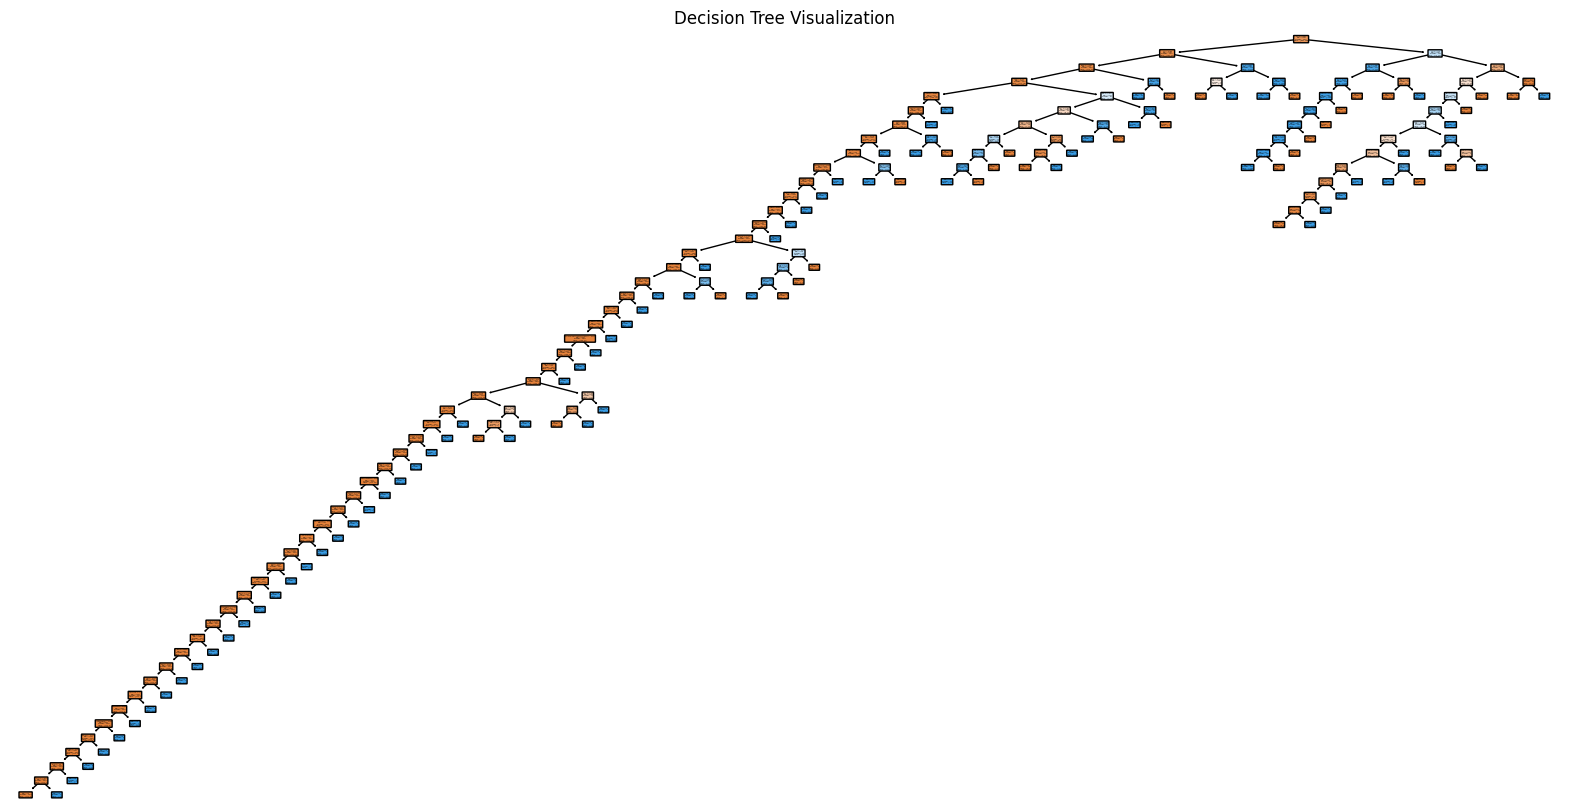

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(20, 10))

# Plot the tree
plot_tree(decision_tree,
          feature_names=feature_names,
          class_names=['ham', 'spam'],
          filled=True,
          rounded=True)

plt.title("Decision Tree Visualization")
plt.show()

Predict for new mail

In [ ]:
#prediction
new_mail=[["Thank you for your purchase. Your order has been shipped"]]
new_mail_vectorized = tfidf_vectorizer.transform([new_mail[0][0]])
prediction=decision_tree.predict(new_mail_vectorized)
if  prediction[0]==0:
  print("ham mail")
else:
  print("spam mail")

ham mail
